# Forecasting of general sales
Author: Raziel Amador Rios   
Oct 5th 2022  

In [1]:
# General modules:
import os
import time
import itertools
import warnings
warnings.filterwarnings("ignore")
# Date-related modules:
import calendar as cal
from datetime import datetime, timedelta
# Data manipulation:
import pandas as pd
import numpy as np
# Plot modules:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Time-series forecasting
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

In [2]:
# Plot configs:
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (17, 5)
# Pandas config
pd.options.display.float_format= '{:,.4f}'.format

## 1) Input data

In [3]:
df_sales = pd.read_csv("../data/processed_dfs/df_sales.csv", parse_dates=['date'])

print(df_sales.info())
df_sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1684 non-null   datetime64[ns]
 1   sales     1684 non-null   float64       
 2   sales_ma  1678 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 39.6 KB
None


,date,sales,sales_ma
0,2013-01-01,"2,511.6190",NaN
1,2013-01-02,"496,092.4179",NaN
2,2013-01-03,"361,461.2311",NaN
3,2013-01-04,"354,459.6771",NaN
4,2013-01-05,"477,350.1212",NaN
...,...,...,...
1679,2017-08-11,"826,373.7220","820,340.6337"
1680,2017-08-12,"792,630.5351","795,617.3315"
1681,2017-08-13,"865,639.6775","769,343.1191"
1682,2017-08-14,"760,922.4061","764,122.7537"


In [4]:
holiday_prophet = pd.read_csv("../data/processed_dfs/holidays_prophet.csv", parse_dates= ["ds"])
holiday_prophet

,holiday,ds,lower_window,upper_window
0,Holiday,2012-08-10,0,1
1,Holiday,2012-10-09,0,1
2,Holiday,2012-11-02,0,1
3,Holiday,2012-11-03,0,1
4,Holiday,2012-12-25,0,1
...,...,...,...,...
108,Holiday,2017-08-10,0,1
109,Holiday,2017-10-09,0,1
110,Holiday,2017-11-02,0,1
111,Holiday,2017-11-03,0,1


In [5]:
# Pre-processing
df_input_prophet = df_sales.drop(columns= "sales_ma").rename(columns= {"date": "ds", "sales": "y"})
df_input_prophet

,ds,y
0,2013-01-01,"2,511.6190"
1,2013-01-02,"496,092.4179"
2,2013-01-03,"361,461.2311"
3,2013-01-04,"354,459.6771"
4,2013-01-05,"477,350.1212"
...,...,...
1679,2017-08-11,"826,373.7220"
1680,2017-08-12,"792,630.5351"
1681,2017-08-13,"865,639.6775"
1682,2017-08-14,"760,922.4061"


# 2) Time-series forecasting

## 2.1) Vanilla Prophet

In [6]:
m = Prophet()
m = m.fit(df_input_prophet)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -39.0776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3507.39    0.00283302       70.9948           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       3507.62    0.00056399       175.642   7.186e-06       0.001      175  LS failed, Hessian reset 
     168       3508.71   0.000853291        220.27   8.914e-06       0.001      286  LS failed, Hessian reset 
     199       3509.04   0.000353348       63.9657       0.249           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       3511.12   0.000845554       214.779   1.107e-05       0.001      470  LS failed, Hessian reset 
     299       3511.34    0.00288465       100.131      0.9825      0.9825      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

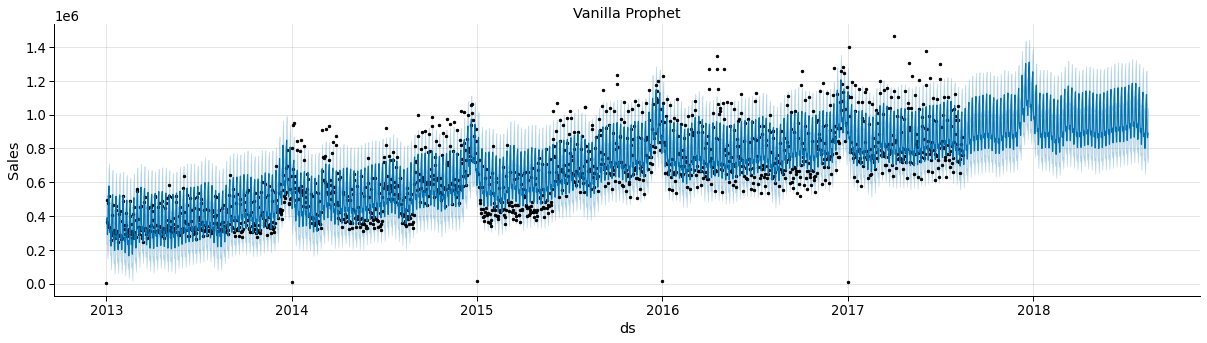

In [7]:
d_plot = m.plot(forecast, figsize= plotsize)
plt.title('Vanilla Prophet')
plt.ylabel("Sales")
plt.tight_layout()

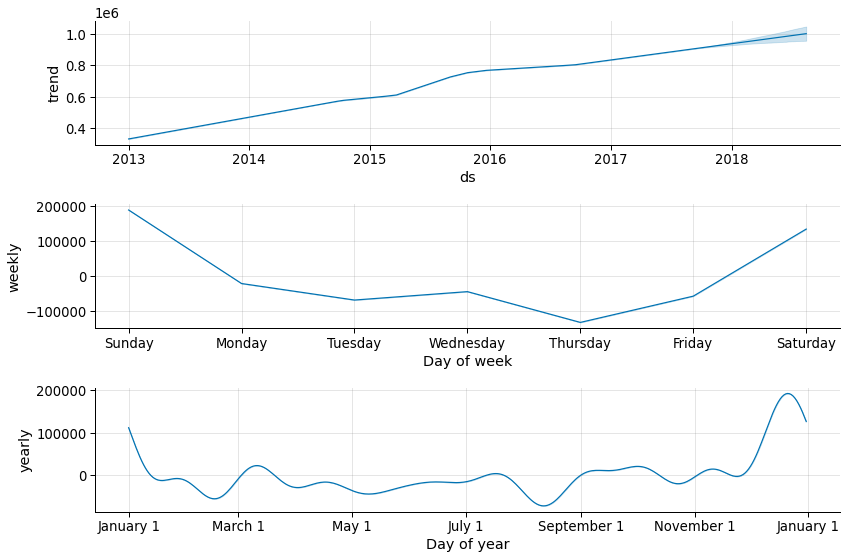

In [8]:
d_components = m.plot_components(forecast, figsize= (12, 8))
plt.tight_layout()

In [9]:
df_cv= cross_validation(m, horizon= '365 days', period= '180 days', initial= '730 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -18.8357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1504.02    0.00147197       71.1431      0.6574      0.6574      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       1505.23    0.00511282        105.73   5.401e-05       0.001      206  LS failed, Hessian reset 
     195       1505.65   0.000234807        81.731   3.078e-06       0.001      306  LS failed, Hessian reset 
     199       1505.66   5.86854e-05       77.8909      0.4396      0.4396      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1505.82   6.90516e-06       83.0284      0.4999      0.4999      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       1505.83   8.62956e-05       86.3899    8.45e-07       0.001      480  LS failed, Hessian rese

In [10]:
metrics= performance_metrics(df_cv)
display(metrics[['horizon', 'mape', 'smape']])
print("Horizon of 365 days MAPE: {:.2%} and sMAPE: {:.4f}".format(metrics.iloc[metrics.shape[0]-1]['mape'], metrics.iloc[metrics.shape[0]-1]['smape']))

,horizon,mape,smape
0,37 days,0.1569,0.1427
1,38 days,0.1605,0.1458
2,39 days,0.1629,0.1481
3,40 days,0.1627,0.1480
4,41 days,0.1631,0.1484
...,...,...,...
324,361 days,0.2485,0.2485
325,362 days,0.2501,0.2509
326,363 days,0.2527,0.2533
327,364 days,0.2509,0.2525


Horizon of 365 days MAPE: 24.95% and sMAPE: 0.2514


## 2.2) Multiplicative Prophet

In [11]:
m = Prophet(seasonality_mode= "multiplicative")
m = m.fit(df_input_prophet)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -39.0776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3537.31    0.00356164        171.83      0.2137      0.2137      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3540.46    0.00193878       162.179           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       3542.07   0.000249493       131.696    1.39e-06       0.001      377  LS failed, Hessian reset 
     299       3542.71    0.00312803       98.4167      0.1585           1      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       3542.85   0.000281802       139.722   4.057e-06       0.001      499  LS failed, Hessian reset 
     382       3542.88   6.35594e-05       78.5888   9.314e-07       0.001      618  LS failed, Hessian rese

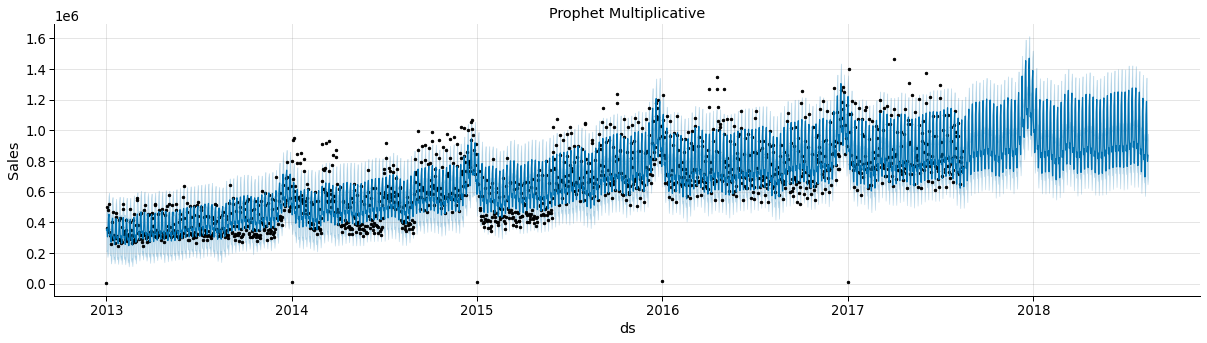

In [12]:
d_plot = m.plot(forecast, figsize= plotsize)
plt.title('Prophet Multiplicative')
plt.ylabel("Sales")
plt.tight_layout()

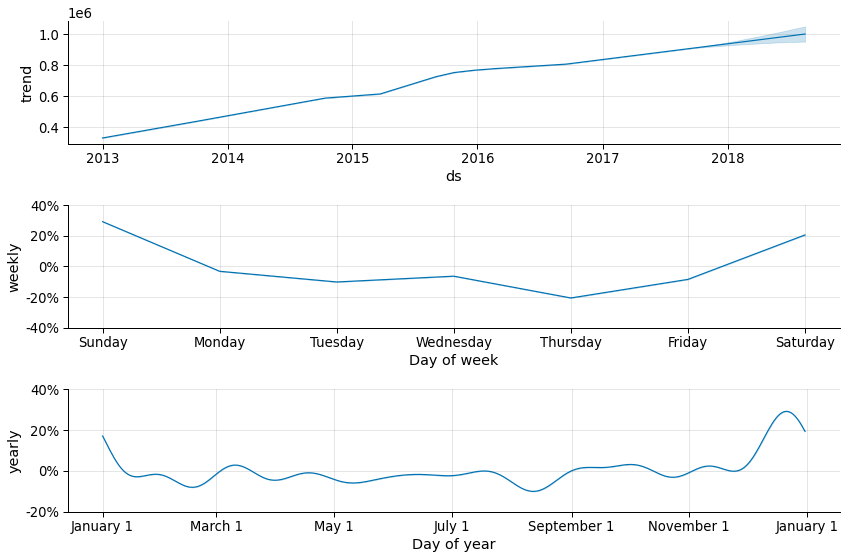

In [13]:
d_components = m.plot_components(forecast, figsize= (12, 8))
plt.tight_layout()

In [14]:
df_cv= cross_validation(m, horizon= '365 days', period= '180 days', initial= '730 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -18.8357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1549.21   0.000558963       69.7207      0.1928           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       1550.57   9.27304e-05       79.8056   1.249e-06       0.001      236  LS failed, Hessian reset 
     199       1550.57   0.000198279       78.5654           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       1550.58   8.33115e-05       76.5521   9.035e-07       0.001      339  LS failed, Hessian reset 
     251       1550.59   4.00686e-08       72.6884     0.08686           1      395   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -27.3094
    Iter      log prob        ||dx||      ||grad||   

In [15]:
metrics= performance_metrics(df_cv)
display(metrics[['horizon', 'mape', 'smape']])
print("Horizon of 365 days MAPE: {:.2%} and sMAPE: {:.4f}".format(metrics.iloc[metrics.shape[0]-1]['mape'], metrics.iloc[metrics.shape[0]-1]['smape']))

,horizon,mape,smape
0,37 days,0.1592,0.1442
1,38 days,0.1634,0.1476
2,39 days,0.1678,0.1517
3,40 days,0.1699,0.1536
4,41 days,0.1703,0.1540
...,...,...,...
324,361 days,0.2599,0.2766
325,362 days,0.2601,0.2778
326,363 days,0.2603,0.2785
327,364 days,0.2573,0.2765


Horizon of 365 days MAPE: 25.52% and sMAPE: 0.2748


## 2.2) Multiplicative + Holidays

In [16]:
m = Prophet(seasonality_mode= "multiplicative", holidays= holiday_prophet)
m = m.fit(df_input_prophet)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -39.0776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3572.86    0.00734992       86.0782           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3576.5   0.000107847       99.1121      0.7706      0.7706      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3579.51    0.00237322       87.9014           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       3579.59   0.000205973       86.5106   2.377e-06       0.001      465  LS failed, Hessian reset 
     399       3579.61   4.17958e-06       79.9743      0.3009      0.3009      541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3579.68    7.6285e-05    

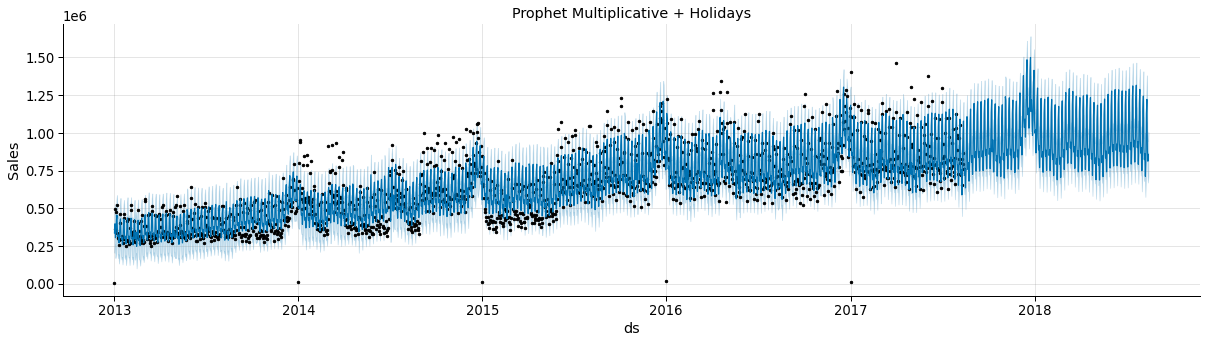

In [17]:
d_plot = m.plot(forecast, figsize= plotsize)
plt.title('Prophet Multiplicative + Holidays')
plt.ylabel("Sales")
plt.tight_layout()

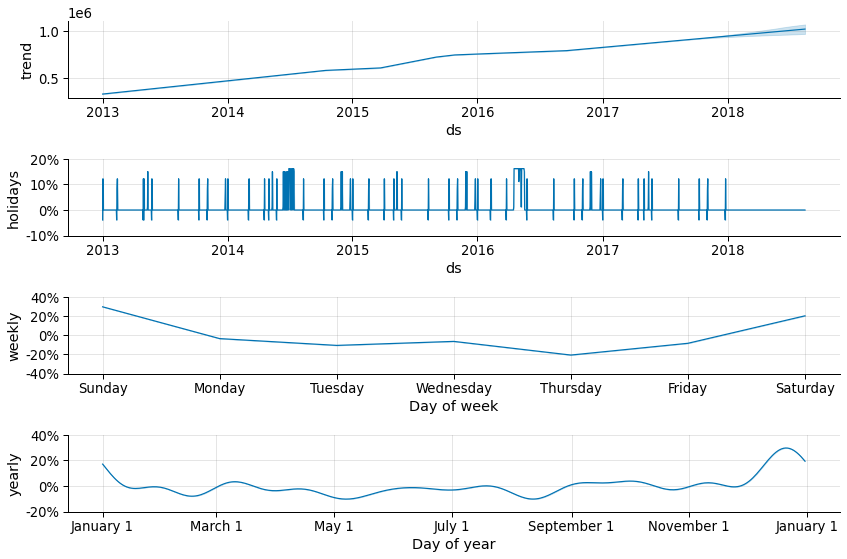

In [18]:
d_components = m.plot_components(forecast, figsize= (12, 8))
plt.tight_layout()

In [19]:
df_cv= cross_validation(m, horizon= '365 days', period= '180 days', initial= '730 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -18.8357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1565.31   0.000766723       82.8799      0.6263      0.6263      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       1566.54   0.000347476       76.8002   5.102e-06       0.001      222  LS failed, Hessian reset 
     199       1567.07   0.000434084       77.9502           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1568.15   2.65928e-06       77.5923           1           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       1568.15   8.08349e-07       66.6567   9.982e-09       0.001      480  LS failed, Hessian reset 
     345       1568.15   4.42407e-08       72.0462      0.5615      0.5615      490   
Optimization terminat

In [20]:
metrics= performance_metrics(df_cv)
display(metrics[['horizon', 'mape', 'smape']])
print("Horizon of 365 days MAPE: {:.2%} and sMAPE: {:.4f}".format(metrics.iloc[metrics.shape[0]-1]['mape'], metrics.iloc[metrics.shape[0]-1]['smape']))

,horizon,mape,smape
0,37 days,0.1517,0.1382
1,38 days,0.1563,0.1419
2,39 days,0.1604,0.1457
3,40 days,0.1627,0.1480
4,41 days,0.1642,0.1494
...,...,...,...
324,361 days,0.2485,0.2677
325,362 days,0.2484,0.2686
326,363 days,0.2482,0.2690
327,364 days,0.2452,0.2670


Horizon of 365 days MAPE: 24.39% and sMAPE: 0.2660


## 2.3) Prophet + Holidays + Regressor

In [21]:
def close_days(ds):
    """
    NFL season: August, September, October, November, December, January, February
    Sunday => 6 | range: 0-6 => Monday-Sunday
    """
    date = pd.to_datetime(ds)
    if date.month == 1 and date.day == 1:
        return 1
    else: 
        return 0

In [22]:
df_regressor = df_sales.copy()
df_regressor["year"] = df_sales["date"].dt.year
df_regressor.groupby("year").min()

,date,sales,sales_ma
year,,,
2013,2013-01-01,"2,511.6190","316,070.0482"
2014,2014-01-01,"8,602.0654","397,368.9389"
2015,2015-01-01,"12,773.6170","442,521.7961"
2016,2016-01-01,"16,433.3940","688,761.0808"
2017,2017-01-01,"12,082.5010","764,122.7537"


In [23]:
df_regressor["close_days"] = df_regressor["date"].apply(close_days)
df_regressor

,date,sales,sales_ma,year,close_days
0,2013-01-01,"2,511.6190",NaN,2013,1
1,2013-01-02,"496,092.4179",NaN,2013,0
2,2013-01-03,"361,461.2311",NaN,2013,0
3,2013-01-04,"354,459.6771",NaN,2013,0
4,2013-01-05,"477,350.1212",NaN,2013,0
...,...,...,...,...,...
1679,2017-08-11,"826,373.7220","820,340.6337",2017,0
1680,2017-08-12,"792,630.5351","795,617.3315",2017,0
1681,2017-08-13,"865,639.6775","769,343.1191",2017,0
1682,2017-08-14,"760,922.4061","764,122.7537",2017,0


In [24]:
df_regressor = df_regressor.drop(columns= ["sales_ma", "year"]).rename(columns= {"date": "ds", "sales": "y"})
df_regressor

,ds,y,close_days
0,2013-01-01,"2,511.6190",1
1,2013-01-02,"496,092.4179",0
2,2013-01-03,"361,461.2311",0
3,2013-01-04,"354,459.6771",0
4,2013-01-05,"477,350.1212",0
...,...,...,...
1679,2017-08-11,"826,373.7220",0
1680,2017-08-12,"792,630.5351",0
1681,2017-08-13,"865,639.6775",0
1682,2017-08-14,"760,922.4061",0


In [25]:
m = Prophet(seasonality_mode= "multiplicative", holidays= holiday_prophet)
m.add_regressor('close_days')
m = m.fit(df_regressor)

# Regressor must also be available in future df
future = m.make_future_dataframe(periods=365)
future['close_days'] = future['ds'].apply(close_days)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -39.0776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3725.2      0.010472       213.765           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3732.44   0.000233332       131.929      0.3892      0.3892      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       3735.42   0.000569793       238.699    4.19e-06       0.001      403  LS failed, Hessian reset 
     299       3735.84   0.000401516       78.2024      0.7193      0.7193      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       3736.09   0.000103996       76.2813   1.063e-06       0.001      497  LS failed, Hessian reset 
     399       3736.66   0.000141226       67.1448      0.2397      0.2397      593   
    Iter      log pro

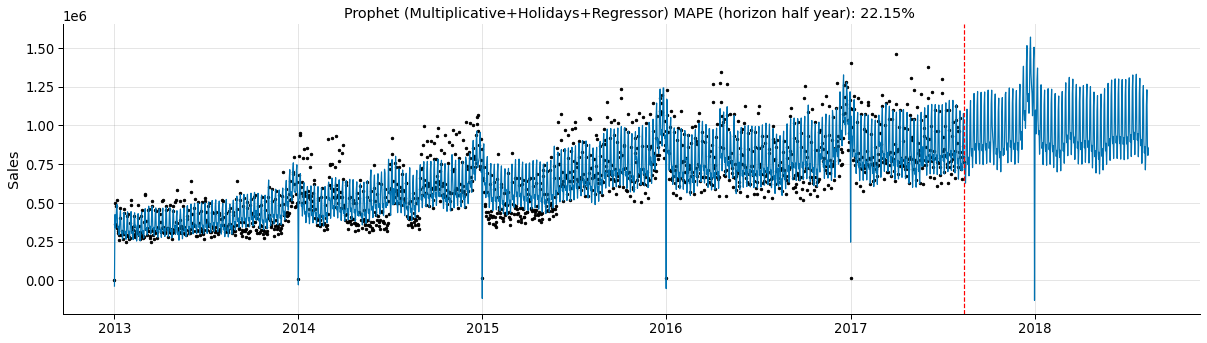

In [26]:
d_plot = m.plot(forecast, uncertainty= False, figsize= plotsize)
plt.title('Prophet (Multiplicative+Holidays+Regressor) MAPE (horizon half year): 22.15% ')
plt.axvline(x= pd.to_datetime(max(df_regressor['ds'])), color = 'red', linestyle= "dashed")
plt.ylabel("Sales")
plt.xlabel("")
# plt.savefig("../plots/prophet_model/forecast_prophet.png")
plt.tight_layout()

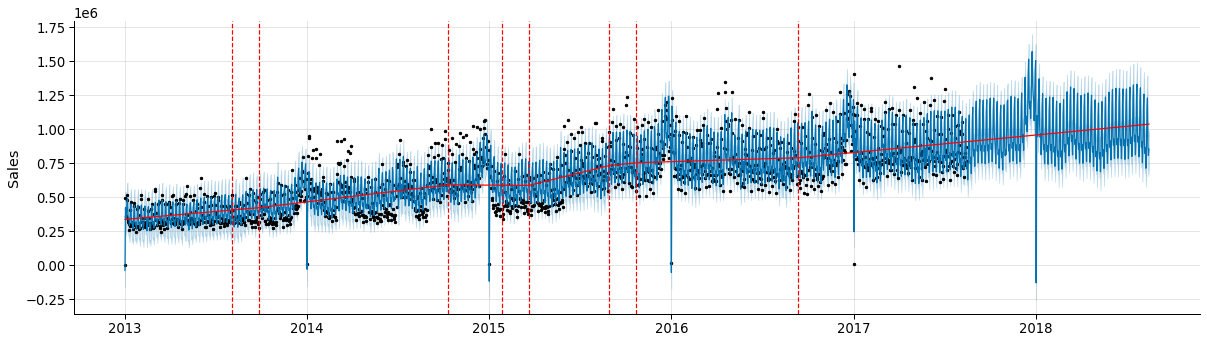

In [27]:
fig = m.plot(forecast, figsize= plotsize)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.ylabel("Sales")
plt.xlabel("")
# plt.savefig("../plots/prophet_model/forecast_prophet_change-points.png")
plt.tight_layout()

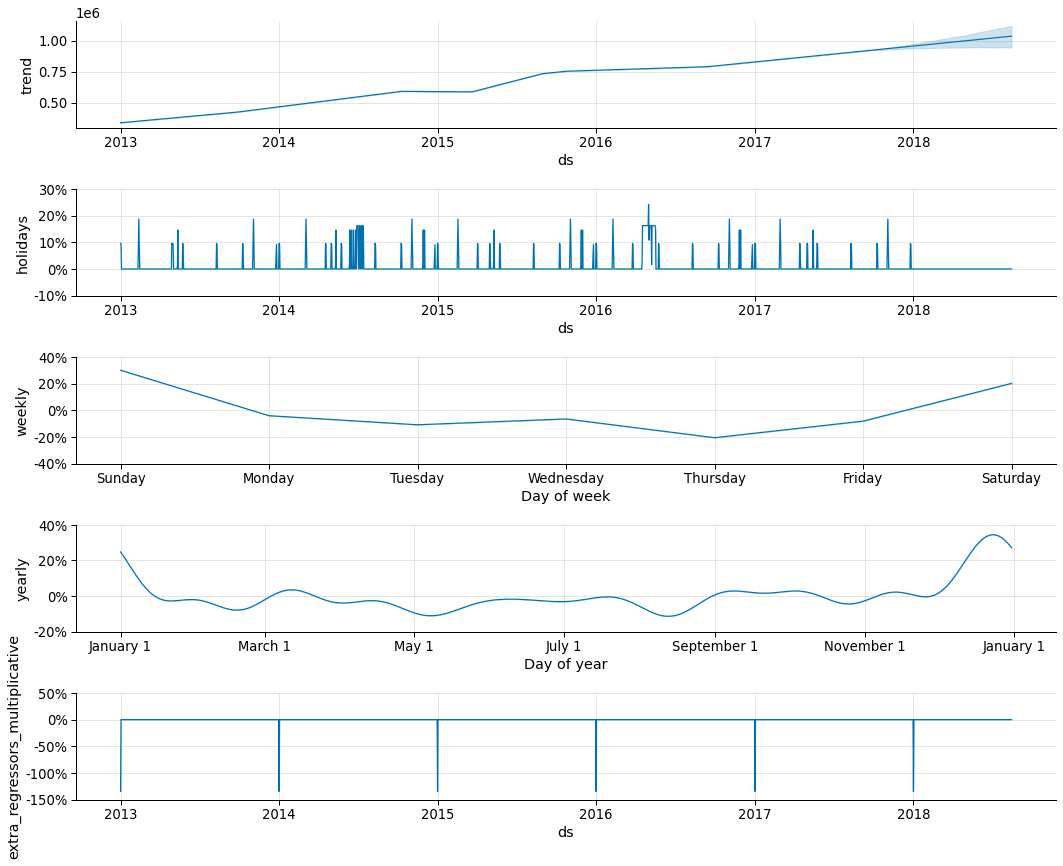

In [28]:
d_components = m.plot_components(forecast, figsize= (15, 12))
# plt.savefig("../plots/prophet_model/forecast_prophet-components.png")
plt.tight_layout()

In [29]:
df_cv= cross_validation(m, horizon= '365 days', period= '180 days', initial= '730 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -18.8357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1620.55    0.00107302       132.866           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       1623.01   0.000735629       190.827   6.266e-06       0.001      264  LS failed, Hessian reset 
     199       1623.51    0.00178565       75.4897           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       1624.16   6.49187e-06       82.4353   8.815e-08       0.001      404  LS failed, Hessian reset 
     299       1624.16   8.00134e-07       83.7339      0.4118           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       1624.16   3.33854e-07        78.949       0.349           1      463   
Optimization terminat

In [30]:
metrics= performance_metrics(df_cv)
display(metrics[['horizon', 'mape', 'smape']])
print("Horizon of 365 days MAPE: {:.2%} and sMAPE: {:.4f}".format(metrics.iloc[metrics.shape[0]-1]['mape'], metrics.iloc[metrics.shape[0]-1]['smape']))

,horizon,mape,smape
0,37 days,0.1437,0.1324
1,38 days,0.1488,0.1367
2,39 days,0.1540,0.1416
3,40 days,0.1563,0.1436
4,41 days,0.1567,0.1439
...,...,...,...
324,361 days,0.3041,0.3325
325,362 days,0.3035,0.3335
326,363 days,0.3029,0.3341
327,364 days,0.2993,0.3319


Horizon of 365 days MAPE: 29.80% and sMAPE: 0.3312


In [31]:
metrics.head(150)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,"11,576,188,154.8085","107,592.6956","92,201.6635",0.1437,0.1255,0.1324,0.6138
1,38 days,"12,409,610,088.1472","111,398.4295","95,484.8154",0.1488,0.1288,0.1367,0.5931
2,39 days,"13,119,801,142.2810","114,541.7005","99,004.6571",0.1540,0.1328,0.1416,0.5655
3,40 days,"13,487,119,885.6210","116,134.0600","100,976.6142",0.1563,0.1344,0.1436,0.5517
4,41 days,"13,664,807,884.1218","116,896.5692","101,690.6288",0.1567,0.1358,0.1439,0.5448
...,...,...,...,...,...,...,...,...
145,182 days,"45,032,972,726.2356","212,209.7376","163,300.0065",0.2241,0.1858,0.2512,0.4500
146,183 days,"44,821,302,174.5558","211,710.4206","161,965.3803",0.2225,0.1766,0.2509,0.4638
147,184 days,"44,593,693,786.1626","211,172.1899","160,701.5226",0.2207,0.1631,0.2503,0.4776
148,185 days,"44,908,183,162.1947","211,915.5095","161,154.8769",0.2212,0.1587,0.2517,0.4793


## 2.4) Prophet + Holidays + Regressor + Normalization

In [32]:
df_norm = pd.DataFrame()

df_norm["ds"] = df_sales["date"]
df_norm["y"] = np.log1p(df_sales["sales"]) 
df_norm["close_days"] = df_norm["ds"].apply(close_days)
df_norm

,ds,y,close_days
0,2013-01-01,7.8291,1
1,2013-01-02,13.1145,0
2,2013-01-03,12.7979,0
3,2013-01-04,12.7784,0
4,2013-01-05,13.0760,0
...,...,...,...
1679,2017-08-11,13.6248,0
1680,2017-08-12,13.5831,0
1681,2017-08-13,13.6712,0
1682,2017-08-14,13.5423,0


In [33]:
m = Prophet(seasonality_mode= "multiplicative", holidays= holiday_prophet)
m.add_regressor('close_days')
m = m.fit(df_norm)

# Regressor must also be available in future df
future = m.make_future_dataframe(periods=365)
future['close_days'] = future['ds'].apply(close_days)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -38.4724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6843.95     0.0106838       4315.99           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6888.62   0.000493397       2557.06      0.7015      0.7015      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6984.85    0.00509431       2892.14           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7008.81    0.00119821       989.903      0.6332      0.6332      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7017.02    0.00568646       4826.93           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

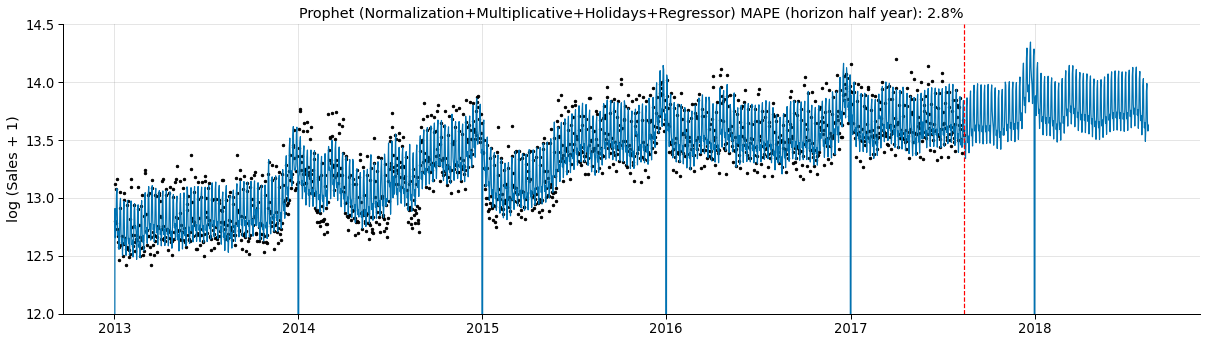

In [42]:
d_plot = m.plot(forecast, uncertainty= False, figsize= plotsize)
plt.axvline(x= pd.to_datetime(max(df_norm['ds'])), color = 'red', linestyle= "dashed")
plt.title('Prophet (Normalization+Multiplicative+Holidays+Regressor) MAPE (horizon half year): 2.8%')
plt.ylim(12,14.5)
plt.xlabel("")
plt.ylabel("log (Sales + 1)")
# plt.savefig("../plots/prophet_model/prophet-model-norm.png")
plt.tight_layout()

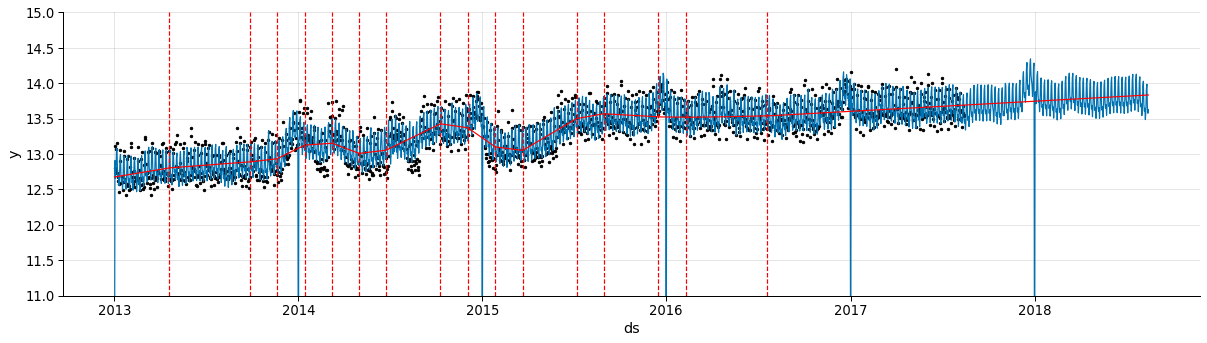

In [35]:
fig = m.plot(forecast, uncertainty= False, figsize= plotsize)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.ylim(11,15)
plt.tight_layout()

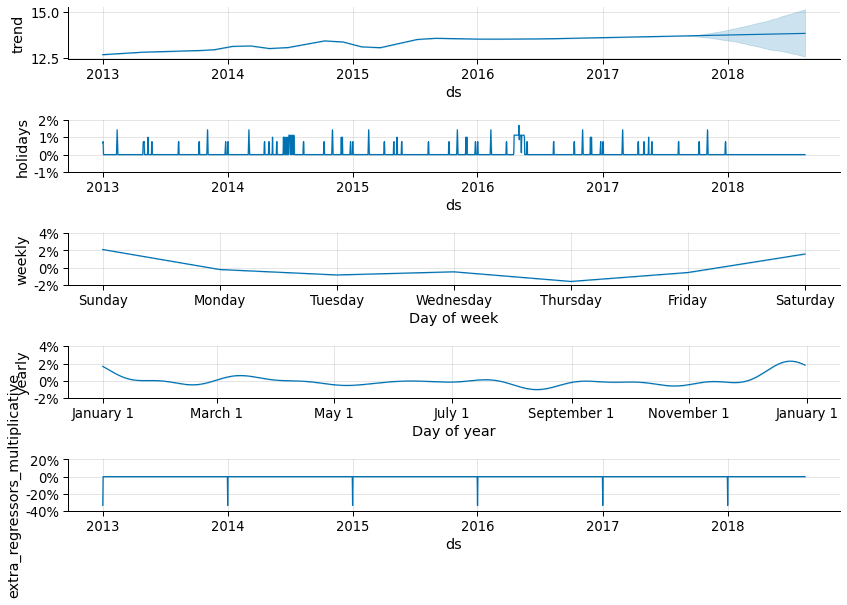

In [36]:
d_components = m.plot_components(forecast, figsize= (12, 8))
plt.tight_layout()

In [37]:
df_cv= cross_validation(m, horizon= '365 days', period= '180 days', initial= '730 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2015-02-22 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

Initial log joint probability = -17.9214
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3156.16    0.00270129        1819.9           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3181.83    0.00432535       771.534           4         0.4      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3187.58     0.0012646       312.441      0.8318      0.8318      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3190.56   0.000146092       267.407           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3193.14    0.00113864       139.163           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [39]:
metrics= performance_metrics(df_cv)
display(metrics[['horizon', 'mape', 'smape']])
print("Horizon of 365 days MAPE: {:.2%} and sMAPE: {:.4f}".format(metrics.iloc[metrics.shape[0]-1]['mape'], metrics.iloc[metrics.shape[0]-1]['smape']))

,horizon,mape,smape
0,37 days,0.0082,0.0082
1,38 days,0.0086,0.0086
2,39 days,0.0090,0.0090
3,40 days,0.0093,0.0093
4,41 days,0.0093,0.0093
...,...,...,...
324,361 days,0.0389,0.0385
325,362 days,0.0389,0.0385
326,363 days,0.0389,0.0385
327,364 days,0.0390,0.0386


Horizon of 365 days MAPE: 3.92% and sMAPE: 0.0388


In [41]:
metrics.head(150)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.0202,0.1421,0.1106,0.0082,0.0065,0.0082,0.7845
1,38 days,0.0225,0.1500,0.1158,0.0086,0.0066,0.0086,0.7707
2,39 days,0.0250,0.1582,0.1215,0.0090,0.0067,0.0090,0.7517
3,40 days,0.0260,0.1611,0.1249,0.0093,0.0072,0.0093,0.7379
4,41 days,0.0260,0.1612,0.1252,0.0093,0.0072,0.0093,0.7379
...,...,...,...,...,...,...,...,...
145,182 days,0.2249,0.4742,0.3882,0.0287,0.0298,0.0288,0.5345
146,183 days,0.2254,0.4748,0.3879,0.0287,0.0298,0.0287,0.5345
147,184 days,0.2255,0.4749,0.3877,0.0287,0.0298,0.0287,0.5345
148,185 days,0.2261,0.4755,0.3884,0.0288,0.0266,0.0288,0.5345
